<a href="https://colab.research.google.com/github/YeongChaeYun7/Python/blob/main/opencv_07_imageRotation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이미지 회전

In [ ]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

Saving img2.jpg to img2 (1).jpg


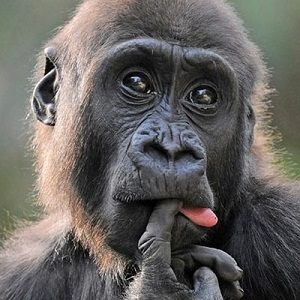

In [ ]:
file = files.upload()
img = cv2.imread("img2.jpg") 
cv2_imshow(img)

# cv.2getRotationMatrix2D 

OpenCV에서 제공하는 cv.2getRotationMatrix2D를 이용하면 

'영상의 중앙'을 기준점으로 회전

cv2.getRotationMatrix2D(center, angle, scale) 

center - 회전 중심 좌표. (x, y)

angle - 반시계 방향 기준 회전 각도(degree)

scale - 확대 비율

실수형 Affine 변환 행렬을 반환한다



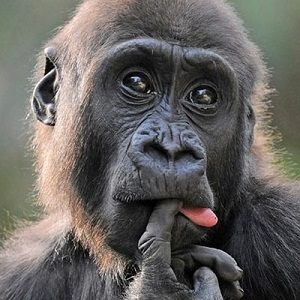

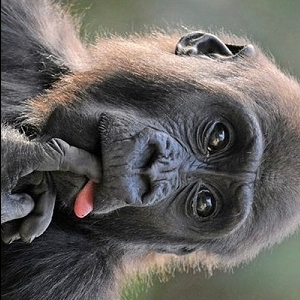

In [ ]:
# 90도 회전

cp = (img.shape[1] / 2, img.shape[0] / 2) # 영상의 가로 1/2, 세로 1/2
rot = cv2.getRotationMatrix2D(cp, -90, 1) # -90도 회전(시계 90도), 스케일 1배

dst = cv2.warpAffine(img, rot, (0, 0))

cv2_imshow(img)
cv2_imshow(dst)

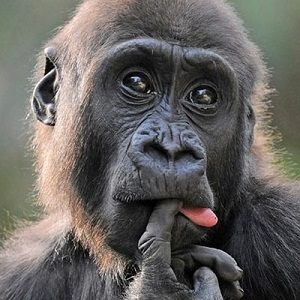

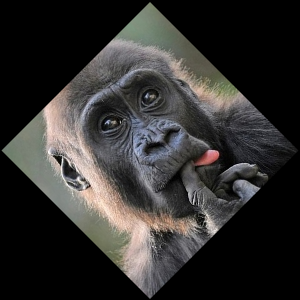

In [ ]:
# 45도 회전

cp = (img.shape[1] / 2, img.shape[0] / 2) # 영상의 가로 1/2, 세로 1/2
rot = cv2.getRotationMatrix2D(cp, 45, 0.7) # -90도 회전(시계 90도), 스케일 0.7배

dst = cv2.warpAffine(img, rot, (0, 0))

cv2_imshow(img)
cv2_imshow(dst)

반시계 방향으로 특정 각도(radian 기준)만큼 회전시킬 때 sin, cos 함수를 활용하여 표현 가능

In [ ]:
# 90도 회전
h, w, c = img.shape

res = np.full(shape=img.shape, fill_value=0, dtype=np.uint8) #img.shape 크기의 0으로 채워진 이미지 생성

angle = 90 * np.pi / 180 # radian 기준. 90도 설정
print(angle)

for y in range(h):
    for x in range(w):
        n_x = int((x-w/2) * np.cos((angle) - (y-h/2) * np.sin((angle) + w/2)
        n_y = int((x-w/2) * np.sin((angle) + (y-h/2) * np.cos((angle) + h/2)

        if n_x >= 0 and n_x < w:
            if n_y >=0 and n_y < h:
                res[n_y][n_x][:] = img[y][x][:]

        for f_y in range(y-1,y+2):
            for f_x in range(x-1, x+2):
                pass


cv2_imshow(res)
res = cv2.medianBlur(res, 3)
cv2_imshow(res)

SyntaxError: ignored